In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd

In [37]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [41]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [44]:
# added to display the column names of the Measurement table
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x262daf93940>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [45]:
# added to display the column names of the Station table
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x262dafd1940>,
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [12]:
# get the lastest date in the data
latest_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date_str[0]

'2017-08-23'

In [15]:
# convert date value from string format into date format
latest_date = dt.datetime.strptime(latest_date_str[0], '%Y-%m-%d')
latest_date.date()

datetime.date(2017, 8, 23)

In [16]:
# calculate the previous year date based on the latest data point
date_prev_yr = dt.date((latest_date.year - 1), latest_date.month, latest_date.day)
print(date_prev_yr)

2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
one_yr_prcp_data = session.query(Measurement.prcp,Measurement.date).filter(Measurement.date >= date_prev_yr).all()
one_yr_prcp_data

[(0.0, '2016-08-23'),
 (0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-1

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
one_yr_prcp_data_df = pd.DataFrame(one_yr_prcp_data)

# Sort the dataframe by date
one_yr_prcp_data_df = one_yr_prcp_data_df.sort_values(["date"])

# drop rows with prcp = NaN
one_yr_prcp_data_df = one_yr_prcp_data_df.dropna()
one_yr_prcp_data_df

,prcp,date
0,0.00,2016-08-23
1529,1.79,2016-08-23
704,0.05,2016-08-23
361,0.15,2016-08-23
1881,0.70,2016-08-23
...,...,...
1527,0.00,2017-08-22
1008,0.00,2017-08-23
360,0.00,2017-08-23
1528,0.08,2017-08-23


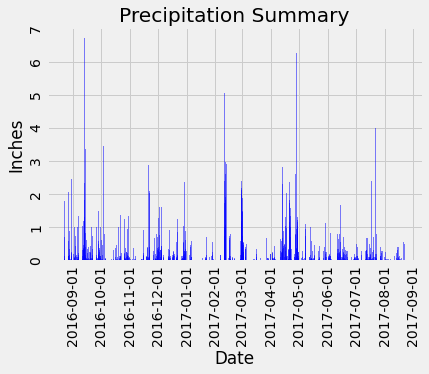

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

#convert dataframe date column values to date for formatting purposes
one_yr_prcp_data_df['date']= pd.to_datetime(one_yr_prcp_data_df['date'])

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = one_yr_prcp_data_df["date"]
y_axis = one_yr_prcp_data_df["prcp"]

fig, ax = plt.subplots()

ax.bar(x_axis, y_axis, color='b', alpha=.5, align="center")
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_form)
ax.set(xlabel="Date",
       ylabel="Inches",
       title="Precipitation Summary")
ax.tick_params(labelrotation=90)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=15))

plt.show()
plt.tight_layout()

In [84]:
# Use Pandas to calculate the summary statistics for the precipitation data
statistics_df = pd.DataFrame(one_yr_data_df["prcp"].describe())
statistics_df

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [85]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Station.name,Station.station,Station.id).count()
stations_count

9

In [90]:
# create a dataframe using Station table 
stations_df = pd.DataFrame(session.query(Station.station,Station.name).all())
stations_df

,station,name
0,USC00519397,"WAIKIKI 717.2, HI US"
1,USC00513117,"KANEOHE 838.1, HI US"
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,USC00517948,"PEARL CITY, HI US"
4,USC00518838,"UPPER WAHIAWA 874.3, HI US"
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
6,USC00519281,"WAIHEE 837.5, HI US"
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US"
8,USC00516128,"MANOA LYON ARBO 785.2, HI US"


In [91]:
# group Measurement table data by station and order by the count in descending order
stations_data = session.query(Measurement.station, func.count(Measurement.station).label("count")).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# convert results into dataframe
stations_data_df = pd.DataFrame(stations_data)
stations_data_df

,station,count,name
0,USC00519281,2772,"WAIHEE 837.5, HI US"
1,USC00519397,2724,"WAIKIKI 717.2, HI US"
2,USC00513117,2709,"KANEOHE 838.1, HI US"
3,USC00519523,2669,"WAIMANALO EXPERIMENTAL FARM, HI US"
4,USC00516128,2612,"MANOA LYON ARBO 785.2, HI US"
5,USC00514830,2202,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
6,USC00511918,1979,"HONOLULU OBSERVATORY 702.2, HI US"
7,USC00517948,1372,"PEARL CITY, HI US"
8,USC00518838,511,"UPPER WAHIAWA 874.3, HI US"


In [118]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
merged_df = pd.merge(stations_data_df,stations_df, on="station")

merged_df = merged_df.rename(columns={"name":"Station Name","station":"Station ID","count":"No. of Stations"})
merged_df = merged_df[["Station ID","Station Name","No. of Stations"]]
merged_df

,Station ID,Station Name,No. of Stations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [126]:
# retrieve the most active station id and station name from the previous table
most_active_station = merged_df.head(1)
most_active_station_id = most_active_station.iloc[:,0]
most_active_station_name = most_active_station.iloc[:,1]

# retrieve the minimum, maximum and average temperature of the most active station
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station_id[0]).all()
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station_id[0]).all()
ave_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id[0]).all()

In [137]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
print(f"Station {most_active_station_id[0]} which is located in {most_active_station_name[0]} is the most active station")


Station USC00519281 which is located in WAIHEE 837.5, HI US is the most active station


In [138]:
print(f"Highest temperature recorded in {most_active_station_id[0]} is {max_temp[0][0]}.")
print(f"Lowest temperature recorded in {most_active_station_id[0]} is {min_temp[0][0]}.")
print(f"Average temperature in {most_active_station_id[0]} is {ave_temp[0][0]}.")

Highest temperature recorded in USC00519281 is 85.0.
Lowest temperature recorded in USC00519281 is 54.0.
Average temperature in USC00519281 is 71.66378066378067.


In [223]:
highest_number = session.query(Measurement.station, func.count(Measurement.station).label("count")).filter(Measurement.date >= date_prev_yr).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
highest_number

('USC00519397', 361)

In [224]:
# Choose the station with the highest number of temperature observations.
highest_number = session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
highest_number
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

('USC00519281')

In [225]:
# Perform a query to retrieve temperature
one_yr_temp_data = session.query(Measurement.tobs,Measurement.station).filter(Measurement.date >= date_prev_yr).filter(Measurement.station == highest_number[0]).all()
one_yr_temp_data 

[(77.0, 'USC00519281'),
 (77.0, 'USC00519281'),
 (80.0, 'USC00519281'),
 (80.0, 'USC00519281'),
 (75.0, 'USC00519281'),
 (73.0, 'USC00519281'),
 (78.0, 'USC00519281'),
 (77.0, 'USC00519281'),
 (78.0, 'USC00519281'),
 (80.0, 'USC00519281'),
 (80.0, 'USC00519281'),
 (78.0, 'USC00519281'),
 (78.0, 'USC00519281'),
 (78.0, 'USC00519281'),
 (73.0, 'USC00519281'),
 (74.0, 'USC00519281'),
 (80.0, 'USC00519281'),
 (79.0, 'USC00519281'),
 (77.0, 'USC00519281'),
 (80.0, 'USC00519281'),
 (76.0, 'USC00519281'),
 (79.0, 'USC00519281'),
 (75.0, 'USC00519281'),
 (79.0, 'USC00519281'),
 (78.0, 'USC00519281'),
 (79.0, 'USC00519281'),
 (78.0, 'USC00519281'),
 (78.0, 'USC00519281'),
 (76.0, 'USC00519281'),
 (74.0, 'USC00519281'),
 (77.0, 'USC00519281'),
 (78.0, 'USC00519281'),
 (79.0, 'USC00519281'),
 (79.0, 'USC00519281'),
 (77.0, 'USC00519281'),
 (80.0, 'USC00519281'),
 (78.0, 'USC00519281'),
 (78.0, 'USC00519281'),
 (78.0, 'USC00519281'),
 (77.0, 'USC00519281'),
 (79.0, 'USC00519281'),
 (79.0, 'USC0051

In [226]:
one_yr_temp_data_df = pd.DataFrame(one_yr_temp_data)
one_yr_temp_data_df

,tobs,station
0,77.0,USC00519281
1,77.0,USC00519281
2,80.0,USC00519281
3,80.0,USC00519281
4,75.0,USC00519281
...,...,...
347,77.0,USC00519281
348,77.0,USC00519281
349,76.0,USC00519281
350,76.0,USC00519281


In [227]:
only_high_freq_temp_df = one_yr_temp_data_df[["tobs"]]
only_high_freq_temp_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


In [228]:
high_freq_grouping = only_high_freq_temp_df["tobs"].value_counts()
high_freq_grouping_df = pd.DataFrame(high_freq_grouping)
high_freq_grouping_df = high_freq_grouping_df.reset_index(drop=False)
high_freq_grouping_df = high_freq_grouping_df.rename(columns={"index":"temp","tobs":"count"})
high_freq_grouping_df

,temp,count
0,74.0,39
1,75.0,33
2,76.0,33
3,77.0,31
4,70.0,22
5,78.0,22
6,72.0,22
7,69.0,19
8,73.0,18
9,79.0,18


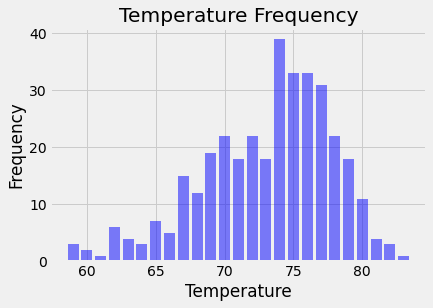

<Figure size 432x288 with 0 Axes>

In [229]:
#convert dataframe date column values to date for formatting purposes
#one_yr_temp_data_df['date']= pd.to_datetime(one_yr_data_df['date'])

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = high_freq_grouping_df["temp"]
y_axis = high_freq_grouping_df["count"]

fig, ax = plt.subplots()

ax.bar(x_axis, y_axis, color='b', alpha=.5, align="center")

ax.set(xlabel="Temperature",
       ylabel="Frequency",
       title="Temperature Frequency")
#ax.xaxis.tick_params(labelrotation=90)
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()
plt.tight_layout()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
